In [1]:
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.sparse as sps
import sys
from matplotlib import pyplot as plt
sys.path.append("../../")

In [2]:
from spook import SpookPosL1, SpookPosL2, SpookL1, SpookLinSolve

Text(0, 0.5, '$\\omega$')

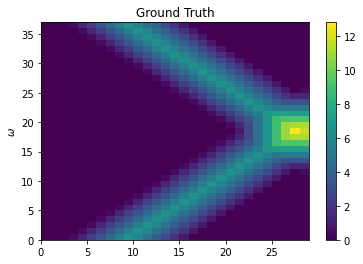

In [3]:
Na = 37
Nb = 29
Ns = 10000
Ng = 31

A = np.random.rand(Ns, Na) * 5
Xtrue = np.zeros((Na, Nb))
bb, aa = np.meshgrid(np.arange(Nb), np.arange(Na))
for p1, p2 in zip([1,-1],[1,-1]):
    tmp = 0.1*(Na+Nb) - abs((aa - Na//2) + p1* (bb - Nb//2) - p2* 0.2*(Na+Nb))
    tmp[tmp<0] = 0
    Xtrue += tmp

plt.pcolormesh(Xtrue)
plt.colorbar()
plt.title("Ground Truth")
plt.ylabel("$\omega$")

In [4]:
G = np.identity(Ng) - 0.2*np.diag(np.ones(Ng-1),k=-1) - 0.2*np.diag(np.ones(Ng-1),k=1)
G = G[:,:Nb]

B0 = A @ Xtrue
B1 = B0 @ (G.T)
B0 += 1e-3*np.linalg.norm(B0) * np.random.randn(*(B0.shape))
B1 += 1e-3*np.linalg.norm(B1) * np.random.randn(*(B1.shape))

In [5]:
SpookPosL1.verbose=True
SpookPosL2.verbose=True
SpookL1.verbose=True

## With `G=None`

Setting up the OSQP problem
Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


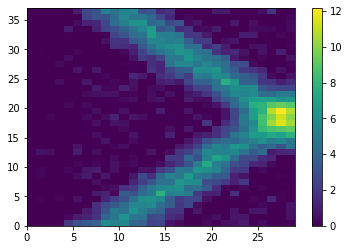

In [6]:
spk0 = SpookPosL1(B0, A, "raw", lsparse=0.1, lsmooth=(0.,0.0))

X0 = spk0.getXopt()
plt.pcolormesh(X0)
plt.colorbar()

Sparsity hyperparam updated.
Setting up the OSQP problem
Updated
Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


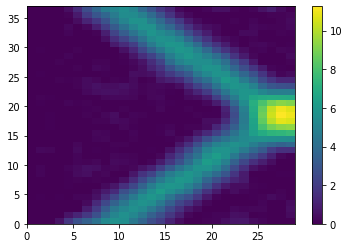

In [7]:
X0 = spk0.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X0)
plt.colorbar()

In [8]:
AtB0, AtA = spk0._Bcontracted, spk0._AtA

spk0ctr = SpookPosL1(AtB0, AtA, "contracted", lsparse=5, lsmooth=(0.1,0.1))

Setting up the OSQP problem


Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


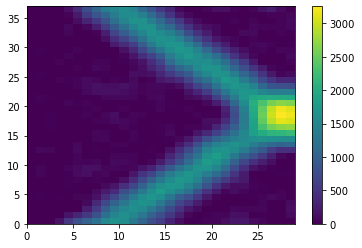

In [9]:
X0ctr = spk0ctr.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X0ctr)
plt.colorbar()

In [10]:
AtB0, AtA = A.T @ B0, A.T @ A
spk0ctr = SpookPosL1(AtB0, AtA, "contracted", lsparse=5, lsmooth=(0.1,0.1))

Setting up the OSQP problem


Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


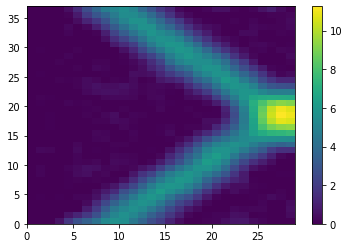

In [11]:
X0ctr = spk0ctr.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X0ctr)
plt.colorbar()

Setting up the OSQP problem
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


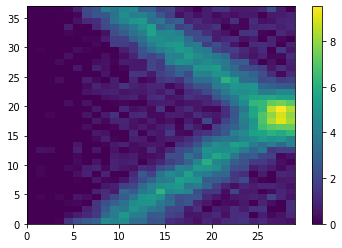

In [12]:
spk0 = SpookPosL2(B0, A, "raw", lsparse=0.1, lsmooth=(0.,0.0))

X0 = spk0.getXopt()
plt.pcolormesh(X0)
plt.colorbar()

Structure of P matrix remained the same
Updated
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


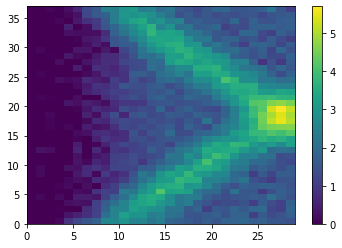

In [13]:
X0 = spk0.getXopt(lsparse=0.5, lsmooth=(0,0))
plt.pcolormesh(X0)
plt.colorbar()

Structure of P matrix remained the same
Setting up the OSQP problem
Updated
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


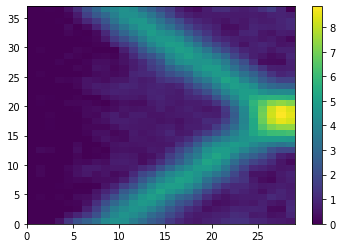

In [14]:
X0 = spk0.getXopt(lsparse=0.1, lsmooth=(0.1,0.1))
plt.pcolormesh(X0)
plt.colorbar()

Setting up the OSQP problem
L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


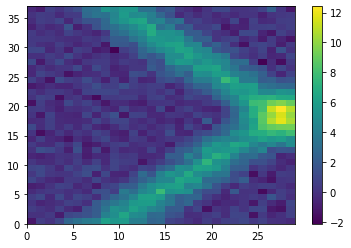

In [15]:
spk0 = SpookL1(B0, A, "raw", lsparse=0.1, lsmooth=(0.,0.0))

X0 = spk0.getXopt()
plt.pcolormesh(X0)
plt.colorbar()

Sparsity hyperparam updated.
Setting up the OSQP problem
Updated
L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


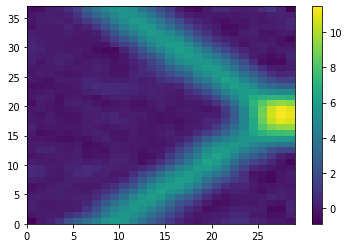

In [16]:
X0 = spk0.getXopt(lsparse=5,lsmooth=(0.1,0.1))
plt.pcolormesh(X0)
plt.colorbar()

## With non trivial G

In [17]:
spk1 = SpookPosL2(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.01,0.01))

Setting up the OSQP problem


Structure of P matrix remained the same
Structure of P matrix remained the same
Updated
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


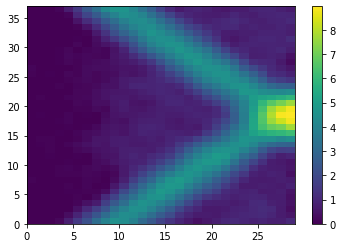

In [18]:
X1 = spk1.getXopt(lsparse=0.05, lsmooth=(0.1,0.1))
plt.pcolormesh(X1)
plt.colorbar()

In [19]:
spk1 = SpookPosL1(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.01,0.01))

Setting up the OSQP problem


Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


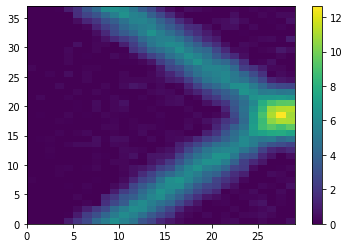

In [20]:
X1 = spk1.getXopt()
plt.pcolormesh(X1)
plt.colorbar()

In [21]:
AtB1, AtA = spk1._Bcontracted, spk1._AtA
GtG = spk1._GtG

In [22]:
spk1ctr = SpookPosL1(AtB1, AtA, "contracted", GtG, lsparse=0.1, lsmooth=(0.01,0.01))

Setting up the OSQP problem


Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


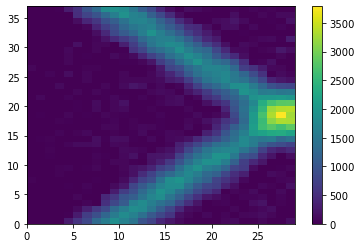

In [23]:
X1ctr = spk1ctr.getXopt()
plt.pcolormesh(X1ctr)
plt.colorbar()

In [24]:
AtB1G, AtA = A.T @ B1 @ G, A.T @ A
GtG = G.T @ G

spk1ctr = SpookPosL1(AtB1G, AtA, "contracted", GtG, lsparse=0.1, lsmooth=(0.01,0.01))

Setting up the OSQP problem


In [25]:
spk1 = SpookL1(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.0,0.0))

Setting up the OSQP problem


L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


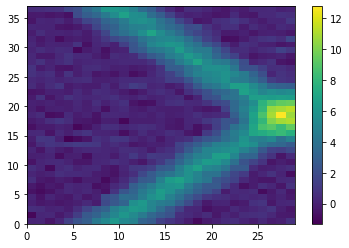

In [26]:
X1 = spk1.getXopt()
plt.pcolormesh(X1)
plt.colorbar()

Sparsity hyperparam updated.
Structure of P matrix remained the same
Updated
L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


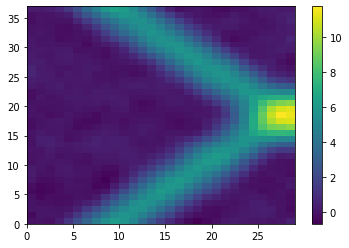

In [27]:
X1 = spk1.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X1)
plt.colorbar()

In [28]:
spk1 = SpookLinSolve(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.01,0.01))

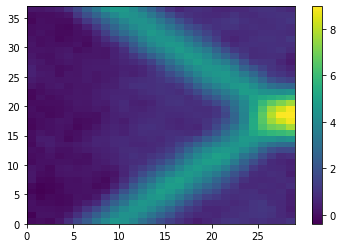

In [29]:
X1 = spk1.getXopt(lsparse=0.05, lsmooth=(0.1,0.1))
plt.pcolormesh(X1)
plt.colorbar()

In [30]:
AtB1, AtA = spk1._Bcontracted, spk1._AtA
GtG = spk1._GtG

spk1ctr = SpookLinSolve(AtB1, AtA, "contracted", GtG, lsparse=0.05, lsmooth=(0.1,0.1))

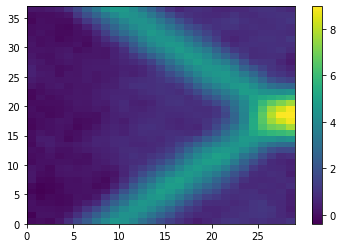

In [33]:
X1ctr = spk1ctr.getXopt()
plt.pcolormesh(X1ctr)
plt.colorbar()

In [32]:
AtB1G, AtA = A.T @ B1 @ G, A.T @ A
GtG = G.T @ G

spk1ctr = SpookLinSolve(AtB1G, AtA, "contracted", GtG, lsparse=0.05, lsmooth=(0.1,0.1))